In [21]:
import geopandas as gpd
from matplotlib import pyplot as plt

In [8]:
from gerrychain import Graph, Partition, Election, MarkovChain

from gerrychain.updaters import Tally, cut_edges
from gerrychain.constraints import UpperBound, single_flip_contiguous, within_percent_of_ideal_population
from gerrychain.proposals import propose_random_flip
from gerrychain.accept import always_accept

In [4]:
graph = Graph.from_json("texas_2022_graph.json")
gdf = gpd.read_file("texas_2022.shp.zip")

In [35]:
list(gdf)

['CNTYKEY',
 'VTDKEY',
 'CNTYVTD',
 'CountyFIPS',
 'County',
 'total',
 'anglo',
 'nanglo',
 'asian',
 'black',
 'hisp',
 'bh',
 'vap',
 'anglovap',
 'nanglovap',
 'asianvap',
 'blackvap',
 'hispvap',
 'bhvap',
 'GOV2022R',
 'GOV22G',
 'GOV22D',
 'GOV22L',
 'GOV22WI',
 'LTG22D',
 'LTG22R',
 'LTG22L',
 'ATG22L',
 'ATG22D',
 'ATG22R',
 'enacted_cd',
 'geometry']

In [36]:
election = Election("GOV22", {"Dem": "GOV22D", "Rep": "GOV2022R"})

initial_partition = Partition(
    graph,
    assignment="enacted_cd",
    updaters={
        "cut_edges": cut_edges,
        "population": Tally("total", alias="population"),
        "GOV22": election
    }
)

In [37]:
ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)
pop_constraint = within_percent_of_ideal_population(initial_partition, 0.05)

compactness_bound = UpperBound(
    lambda p: len(p["cut_edges"]),
    5*len(initial_partition["cut_edges"])
)

In [38]:
chain = MarkovChain(
    proposal=propose_random_flip,
    constraints=[single_flip_contiguous, pop_constraint, compactness_bound],
    accept=always_accept,
    initial_state=initial_partition,
    total_steps=100000
)

Election Results for GOV22
5:
  Dem: 0.3469
  Rep: 0.6531
18:
  Dem: 0.2241
  Rep: 0.7759
16:
  Dem: 0.3442
  Rep: 0.6558
26:
  Dem: 0.3516
  Rep: 0.6484
12:
  Dem: 0.2429
  Rep: 0.7571
27:
  Dem: 0.527
  Rep: 0.473
9:
  Dem: 0.3763
  Rep: 0.6237
20:
  Dem: 0.3825
  Rep: 0.6175
30:
  Dem: 0.3772
  Rep: 0.6228
10:
  Dem: 0.2538
  Rep: 0.7462
19:
  Dem: 0.6714
  Rep: 0.3286
34:
  Dem: 0.7389
  Rep: 0.2611
22:
  Dem: 0.4475
  Rep: 0.5525
0:
  Dem: 0.2196
  Rep: 0.7804
3:
  Dem: 0.3354
  Rep: 0.6646
13:
  Dem: 0.3256
  Rep: 0.6744
21:
  Dem: 0.3968
  Rep: 0.6032
8:
  Dem: 0.7664
  Rep: 0.2336
14:
  Dem: 0.4691
  Rep: 0.5309
24:
  Dem: 0.3125
  Rep: 0.6875
33:
  Dem: 0.5672
  Rep: 0.4328
35:
  Dem: 0.3163
  Rep: 0.6837
2:
  Dem: 0.4003
  Rep: 0.5997
31:
  Dem: 0.6508
  Rep: 0.3492
25:
  Dem: 0.3792
  Rep: 0.6208
23:
  Dem: 0.4161
  Rep: 0.5839
29:
  Dem: 0.7768
  Rep: 0.2232
4:
  Dem: 0.3584
  Rep: 0.6416
32:
  Dem: 0.7389
  Rep: 0.2611
15:
  Dem: 0.6473
  Rep: 0.3527
6:
  Dem: 0.643
  Rep:

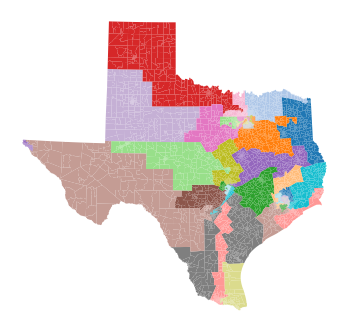

Election Results for GOV22
5:
  Dem: 0.3611
  Rep: 0.6389
18:
  Dem: 0.2264
  Rep: 0.7736
16:
  Dem: 0.3416
  Rep: 0.6584
26:
  Dem: 0.3447
  Rep: 0.6553
12:
  Dem: 0.2434
  Rep: 0.7566
27:
  Dem: 0.5533
  Rep: 0.4467
9:
  Dem: 0.4369
  Rep: 0.5631
20:
  Dem: 0.4092
  Rep: 0.5908
30:
  Dem: 0.3754
  Rep: 0.6246
10:
  Dem: 0.2349
  Rep: 0.7651
19:
  Dem: 0.6399
  Rep: 0.3601
34:
  Dem: 0.6823
  Rep: 0.3177
22:
  Dem: 0.4462
  Rep: 0.5538
0:
  Dem: 0.2231
  Rep: 0.7769
3:
  Dem: 0.3509
  Rep: 0.6491
13:
  Dem: 0.3347
  Rep: 0.6653
21:
  Dem: 0.4169
  Rep: 0.5831
8:
  Dem: 0.7235
  Rep: 0.2765
14:
  Dem: 0.4662
  Rep: 0.5338
24:
  Dem: 0.3196
  Rep: 0.6804
33:
  Dem: 0.555
  Rep: 0.445
35:
  Dem: 0.312
  Rep: 0.688
2:
  Dem: 0.4034
  Rep: 0.5966
31:
  Dem: 0.6108
  Rep: 0.3892
25:
  Dem: 0.3705
  Rep: 0.6295
23:
  Dem: 0.4338
  Rep: 0.5662
29:
  Dem: 0.7602
  Rep: 0.2398
4:
  Dem: 0.3418
  Rep: 0.6582
32:
  Dem: 0.6672
  Rep: 0.3328
15:
  Dem: 0.6493
  Rep: 0.3507
6:
  Dem: 0.5779
  Rep: 

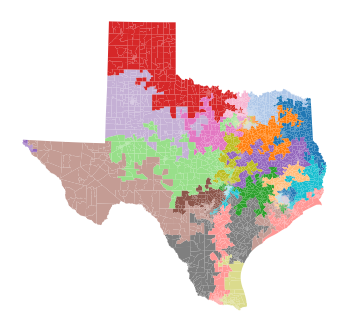

Election Results for GOV22
5:
  Dem: 0.3632
  Rep: 0.6368
18:
  Dem: 0.2235
  Rep: 0.7765
16:
  Dem: 0.3612
  Rep: 0.6388
26:
  Dem: 0.3371
  Rep: 0.6629
12:
  Dem: 0.2305
  Rep: 0.7695
27:
  Dem: 0.551
  Rep: 0.449
9:
  Dem: 0.4641
  Rep: 0.5359
20:
  Dem: 0.4076
  Rep: 0.5924
30:
  Dem: 0.3644
  Rep: 0.6356
10:
  Dem: 0.2371
  Rep: 0.7629
19:
  Dem: 0.6386
  Rep: 0.3614
34:
  Dem: 0.6726
  Rep: 0.3274
22:
  Dem: 0.4257
  Rep: 0.5743
0:
  Dem: 0.2199
  Rep: 0.7801
3:
  Dem: 0.3336
  Rep: 0.6664
13:
  Dem: 0.34
  Rep: 0.66
21:
  Dem: 0.4423
  Rep: 0.5577
8:
  Dem: 0.745
  Rep: 0.255
14:
  Dem: 0.477
  Rep: 0.523
24:
  Dem: 0.316
  Rep: 0.684
33:
  Dem: 0.5538
  Rep: 0.4462
35:
  Dem: 0.3157
  Rep: 0.6843
2:
  Dem: 0.4193
  Rep: 0.5807
31:
  Dem: 0.5979
  Rep: 0.4021
25:
  Dem: 0.3746
  Rep: 0.6254
23:
  Dem: 0.4543
  Rep: 0.5457
29:
  Dem: 0.7441
  Rep: 0.2559
4:
  Dem: 0.3596
  Rep: 0.6404
32:
  Dem: 0.6353
  Rep: 0.3647
15:
  Dem: 0.6463
  Rep: 0.3537
6:
  Dem: 0.5587
  Rep: 0.4413
1

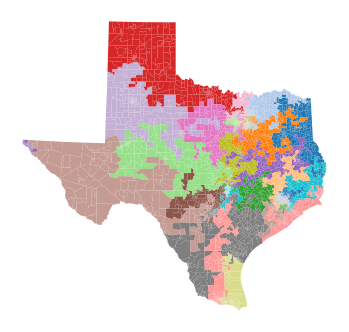

Election Results for GOV22
5:
  Dem: 0.3724
  Rep: 0.6276
18:
  Dem: 0.2171
  Rep: 0.7829
16:
  Dem: 0.3578
  Rep: 0.6422
26:
  Dem: 0.3455
  Rep: 0.6545
12:
  Dem: 0.2373
  Rep: 0.7627
27:
  Dem: 0.5592
  Rep: 0.4408
9:
  Dem: 0.4687
  Rep: 0.5313
20:
  Dem: 0.4116
  Rep: 0.5884
30:
  Dem: 0.3581
  Rep: 0.6419
10:
  Dem: 0.2445
  Rep: 0.7555
19:
  Dem: 0.6041
  Rep: 0.3959
34:
  Dem: 0.6508
  Rep: 0.3492
22:
  Dem: 0.4545
  Rep: 0.5455
0:
  Dem: 0.2168
  Rep: 0.7832
3:
  Dem: 0.3379
  Rep: 0.6621
13:
  Dem: 0.3497
  Rep: 0.6503
21:
  Dem: 0.4527
  Rep: 0.5473
8:
  Dem: 0.72
  Rep: 0.28
14:
  Dem: 0.4702
  Rep: 0.5298
24:
  Dem: 0.3063
  Rep: 0.6937
33:
  Dem: 0.5645
  Rep: 0.4355
35:
  Dem: 0.2907
  Rep: 0.7093
2:
  Dem: 0.4227
  Rep: 0.5773
31:
  Dem: 0.5965
  Rep: 0.4035
25:
  Dem: 0.3834
  Rep: 0.6166
23:
  Dem: 0.4481
  Rep: 0.5519
29:
  Dem: 0.744
  Rep: 0.256
4:
  Dem: 0.3414
  Rep: 0.6586
32:
  Dem: 0.634
  Rep: 0.366
15:
  Dem: 0.6489
  Rep: 0.3511
6:
  Dem: 0.5565
  Rep: 0.44

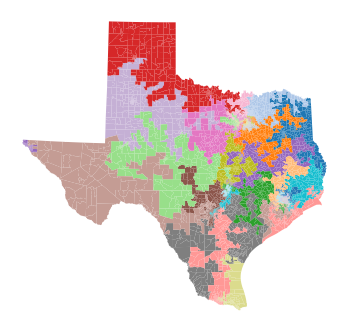

Election Results for GOV22
5:
  Dem: 0.3852
  Rep: 0.6148
18:
  Dem: 0.216
  Rep: 0.784
16:
  Dem: 0.3547
  Rep: 0.6453
26:
  Dem: 0.3309
  Rep: 0.6691
12:
  Dem: 0.2324
  Rep: 0.7676
27:
  Dem: 0.5487
  Rep: 0.4513
9:
  Dem: 0.5022
  Rep: 0.4978
20:
  Dem: 0.3965
  Rep: 0.6035
30:
  Dem: 0.3595
  Rep: 0.6405
10:
  Dem: 0.2489
  Rep: 0.7511
19:
  Dem: 0.6042
  Rep: 0.3958
34:
  Dem: 0.6288
  Rep: 0.3712
22:
  Dem: 0.4449
  Rep: 0.5551
0:
  Dem: 0.2232
  Rep: 0.7768
3:
  Dem: 0.3554
  Rep: 0.6446
13:
  Dem: 0.3507
  Rep: 0.6493
21:
  Dem: 0.4359
  Rep: 0.5641
8:
  Dem: 0.7116
  Rep: 0.2884
14:
  Dem: 0.4806
  Rep: 0.5194
24:
  Dem: 0.3261
  Rep: 0.6739
33:
  Dem: 0.5523
  Rep: 0.4477
35:
  Dem: 0.3025
  Rep: 0.6975
2:
  Dem: 0.4264
  Rep: 0.5736
31:
  Dem: 0.581
  Rep: 0.419
25:
  Dem: 0.3738
  Rep: 0.6262
23:
  Dem: 0.4566
  Rep: 0.5434
29:
  Dem: 0.7452
  Rep: 0.2548
4:
  Dem: 0.3308
  Rep: 0.6692
32:
  Dem: 0.6197
  Rep: 0.3803
15:
  Dem: 0.6489
  Rep: 0.3511
6:
  Dem: 0.584
  Rep: 0

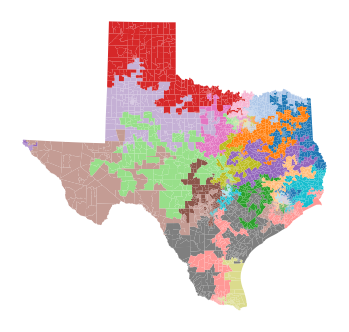

Election Results for GOV22
5:
  Dem: 0.4162
  Rep: 0.5838
18:
  Dem: 0.2099
  Rep: 0.7901
16:
  Dem: 0.369
  Rep: 0.631
26:
  Dem: 0.3376
  Rep: 0.6624
12:
  Dem: 0.2471
  Rep: 0.7529
27:
  Dem: 0.5529
  Rep: 0.4471
9:
  Dem: 0.4934
  Rep: 0.5066
20:
  Dem: 0.4092
  Rep: 0.5908
30:
  Dem: 0.3494
  Rep: 0.6506
10:
  Dem: 0.2414
  Rep: 0.7586
19:
  Dem: 0.6064
  Rep: 0.3936
34:
  Dem: 0.5945
  Rep: 0.4055
22:
  Dem: 0.4561
  Rep: 0.5439
0:
  Dem: 0.2244
  Rep: 0.7756
3:
  Dem: 0.3488
  Rep: 0.6512
13:
  Dem: 0.3775
  Rep: 0.6225
21:
  Dem: 0.4235
  Rep: 0.5765
8:
  Dem: 0.7341
  Rep: 0.2659
14:
  Dem: 0.4636
  Rep: 0.5364
24:
  Dem: 0.3179
  Rep: 0.6821
33:
  Dem: 0.555
  Rep: 0.445
35:
  Dem: 0.2984
  Rep: 0.7016
2:
  Dem: 0.4172
  Rep: 0.5828
31:
  Dem: 0.5931
  Rep: 0.4069
25:
  Dem: 0.3748
  Rep: 0.6252
23:
  Dem: 0.4596
  Rep: 0.5404
29:
  Dem: 0.7442
  Rep: 0.2558
4:
  Dem: 0.3348
  Rep: 0.6652
32:
  Dem: 0.6232
  Rep: 0.3768
15:
  Dem: 0.6496
  Rep: 0.3504
6:
  Dem: 0.5685
  Rep: 

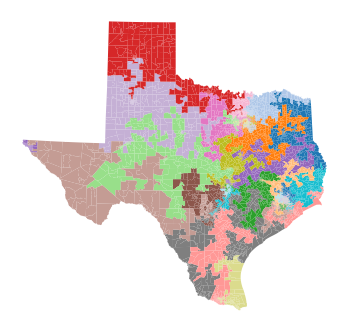

Election Results for GOV22
5:
  Dem: 0.4452
  Rep: 0.5548
18:
  Dem: 0.2153
  Rep: 0.7847
16:
  Dem: 0.3496
  Rep: 0.6504
26:
  Dem: 0.3397
  Rep: 0.6603
12:
  Dem: 0.2314
  Rep: 0.7686
27:
  Dem: 0.5282
  Rep: 0.4718
9:
  Dem: 0.4956
  Rep: 0.5044
20:
  Dem: 0.3878
  Rep: 0.6122
30:
  Dem: 0.3405
  Rep: 0.6595
10:
  Dem: 0.2532
  Rep: 0.7468
19:
  Dem: 0.6008
  Rep: 0.3992
34:
  Dem: 0.6336
  Rep: 0.3664
22:
  Dem: 0.4553
  Rep: 0.5447
0:
  Dem: 0.2241
  Rep: 0.7759
3:
  Dem: 0.3311
  Rep: 0.6689
13:
  Dem: 0.3536
  Rep: 0.6464
21:
  Dem: 0.4594
  Rep: 0.5406
8:
  Dem: 0.7107
  Rep: 0.2893
14:
  Dem: 0.4811
  Rep: 0.5189
24:
  Dem: 0.3255
  Rep: 0.6745
33:
  Dem: 0.5476
  Rep: 0.4524
35:
  Dem: 0.305
  Rep: 0.695
2:
  Dem: 0.4298
  Rep: 0.5702
31:
  Dem: 0.5912
  Rep: 0.4088
25:
  Dem: 0.3872
  Rep: 0.6128
23:
  Dem: 0.447
  Rep: 0.553
29:
  Dem: 0.737
  Rep: 0.263
4:
  Dem: 0.3411
  Rep: 0.6589
32:
  Dem: 0.625
  Rep: 0.375
15:
  Dem: 0.6494
  Rep: 0.3506
6:
  Dem: 0.5621
  Rep: 0.43

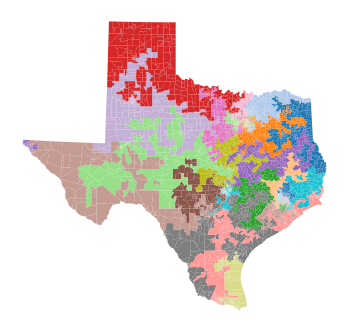

Election Results for GOV22
5:
  Dem: 0.411
  Rep: 0.589
18:
  Dem: 0.2075
  Rep: 0.7925
16:
  Dem: 0.3406
  Rep: 0.6594
26:
  Dem: 0.3339
  Rep: 0.6661
12:
  Dem: 0.2421
  Rep: 0.7579
27:
  Dem: 0.5337
  Rep: 0.4663
9:
  Dem: 0.5271
  Rep: 0.4729
20:
  Dem: 0.3975
  Rep: 0.6025
30:
  Dem: 0.3414
  Rep: 0.6586
10:
  Dem: 0.2585
  Rep: 0.7415
19:
  Dem: 0.6082
  Rep: 0.3918
34:
  Dem: 0.6417
  Rep: 0.3583
22:
  Dem: 0.4333
  Rep: 0.5667
0:
  Dem: 0.2122
  Rep: 0.7878
3:
  Dem: 0.3513
  Rep: 0.6487
13:
  Dem: 0.3515
  Rep: 0.6485
21:
  Dem: 0.4521
  Rep: 0.5479
8:
  Dem: 0.7175
  Rep: 0.2825
14:
  Dem: 0.4746
  Rep: 0.5254
24:
  Dem: 0.3295
  Rep: 0.6705
33:
  Dem: 0.5529
  Rep: 0.4471
35:
  Dem: 0.3046
  Rep: 0.6954
2:
  Dem: 0.4156
  Rep: 0.5844
31:
  Dem: 0.5986
  Rep: 0.4014
25:
  Dem: 0.3719
  Rep: 0.6281
23:
  Dem: 0.4514
  Rep: 0.5486
29:
  Dem: 0.7109
  Rep: 0.2891
4:
  Dem: 0.3686
  Rep: 0.6314
32:
  Dem: 0.6305
  Rep: 0.3695
15:
  Dem: 0.6473
  Rep: 0.3527
6:
  Dem: 0.5555
  Rep

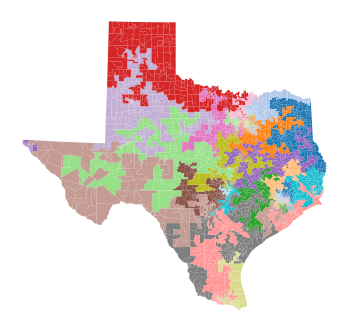

Election Results for GOV22
5:
  Dem: 0.4429
  Rep: 0.5571
18:
  Dem: 0.2074
  Rep: 0.7926
16:
  Dem: 0.3308
  Rep: 0.6692
26:
  Dem: 0.3469
  Rep: 0.6531
12:
  Dem: 0.2517
  Rep: 0.7483
27:
  Dem: 0.5192
  Rep: 0.4808
9:
  Dem: 0.5058
  Rep: 0.4942
20:
  Dem: 0.3836
  Rep: 0.6164
30:
  Dem: 0.3559
  Rep: 0.6441
10:
  Dem: 0.2692
  Rep: 0.7308
19:
  Dem: 0.6049
  Rep: 0.3951
34:
  Dem: 0.6839
  Rep: 0.3161
22:
  Dem: 0.4547
  Rep: 0.5453
0:
  Dem: 0.209
  Rep: 0.791
3:
  Dem: 0.3558
  Rep: 0.6442
13:
  Dem: 0.3519
  Rep: 0.6481
21:
  Dem: 0.463
  Rep: 0.537
8:
  Dem: 0.7175
  Rep: 0.2825
14:
  Dem: 0.4754
  Rep: 0.5246
24:
  Dem: 0.3211
  Rep: 0.6789
33:
  Dem: 0.5456
  Rep: 0.4544
35:
  Dem: 0.3039
  Rep: 0.6961
2:
  Dem: 0.4295
  Rep: 0.5705
31:
  Dem: 0.5839
  Rep: 0.4161
25:
  Dem: 0.3671
  Rep: 0.6329
23:
  Dem: 0.4693
  Rep: 0.5307
29:
  Dem: 0.6913
  Rep: 0.3087
4:
  Dem: 0.357
  Rep: 0.643
32:
  Dem: 0.6353
  Rep: 0.3647
15:
  Dem: 0.6467
  Rep: 0.3533
6:
  Dem: 0.5333
  Rep: 0.

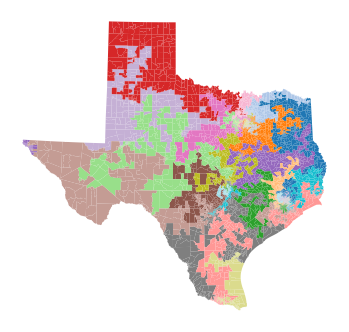

Election Results for GOV22
5:
  Dem: 0.4443
  Rep: 0.5557
18:
  Dem: 0.1987
  Rep: 0.8013
16:
  Dem: 0.3407
  Rep: 0.6593
26:
  Dem: 0.3423
  Rep: 0.6577
12:
  Dem: 0.2605
  Rep: 0.7395
27:
  Dem: 0.508
  Rep: 0.492
9:
  Dem: 0.4801
  Rep: 0.5199
20:
  Dem: 0.4197
  Rep: 0.5803
30:
  Dem: 0.3512
  Rep: 0.6488
10:
  Dem: 0.2658
  Rep: 0.7342
19:
  Dem: 0.601
  Rep: 0.399
34:
  Dem: 0.6971
  Rep: 0.3029
22:
  Dem: 0.441
  Rep: 0.559
0:
  Dem: 0.2033
  Rep: 0.7967
3:
  Dem: 0.3448
  Rep: 0.6552
13:
  Dem: 0.359
  Rep: 0.641
21:
  Dem: 0.4459
  Rep: 0.5541
8:
  Dem: 0.719
  Rep: 0.281
14:
  Dem: 0.4835
  Rep: 0.5165
24:
  Dem: 0.311
  Rep: 0.689
33:
  Dem: 0.5529
  Rep: 0.4471
35:
  Dem: 0.3247
  Rep: 0.6753
2:
  Dem: 0.4304
  Rep: 0.5696
31:
  Dem: 0.6093
  Rep: 0.3907
25:
  Dem: 0.3629
  Rep: 0.6371
23:
  Dem: 0.4621
  Rep: 0.5379
29:
  Dem: 0.6884
  Rep: 0.3116
4:
  Dem: 0.3565
  Rep: 0.6435
32:
  Dem: 0.5965
  Rep: 0.4035
15:
  Dem: 0.6442
  Rep: 0.3558
6:
  Dem: 0.535
  Rep: 0.465
17:

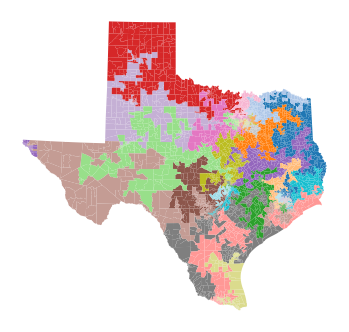

In [40]:
for e,p in enumerate(chain):
    if e % 10000 == 0:
        p.plot(gdf, cmap='tab20', figsize=(6,6))
        print(p['GOV22'])
        plt.axis('off')
        plt.show()
    